# Learning From Data HW04

In [1]:
import numpy as np

## 1 Generalization Error

In [2]:
def conf(eps, N, dvc):
    return 4*((2*N)**dvc)*np.exp(-0.125*N*(eps**2))

In [3]:
conf(0.05, 420000, 10)

697.7536261452768

In [5]:
conf(0.05, 440000, 10)

2.14484271996018

In [4]:
conf(0.05, 460000, 10)

0.006458125661103743

In [6]:
conf(0.05, 480000, 10)

1.9080951877323054e-05

So the answer is 460000, d, the cloest approximation.

In [13]:
delta = 0.05

dVC = 50

def mH(N):
    return N**dVC

def original(N):
    return np.sqrt(8/N * np.log(4*mH(2*N)/delta))

def Rademacher(N):
    return np.sqrt(2*np.log(2*N*mH(N))/N) + np.sqrt(2/N*np.log(1/delta)) + 1/N
    
def Parrondo(N):
    return 1/N + 0.5*np.sqrt(4/N**2 + 4/N * np.log(6*mH(2*N)/delta))

def Devroye(N):
    return (2/N + np.sqrt(4/N**2 + 4*(1-2/N)*(1/(2*N))*(np.log(4) + 2*dVC*np.log(N) - np.log(delta))))/(2*(1-2/N))

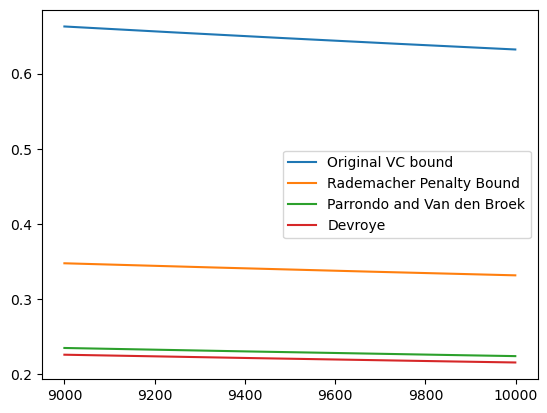

In [18]:
import matplotlib.pyplot as plt

N = np.arange(9000, 10000, dtype=np.float64)
plt.plot(N, original(N))
plt.plot(N, Rademacher(N))
plt.plot(N, Parrondo(N))
plt.plot(N, Devroye(N))

plt.legend([
    "Original VC bound",
    "Rademacher Penalty Bound",
    "Parrondo and Van den Broek",
    "Devroye",
])
#plt.show()

So the Devroye Bound is smallest.

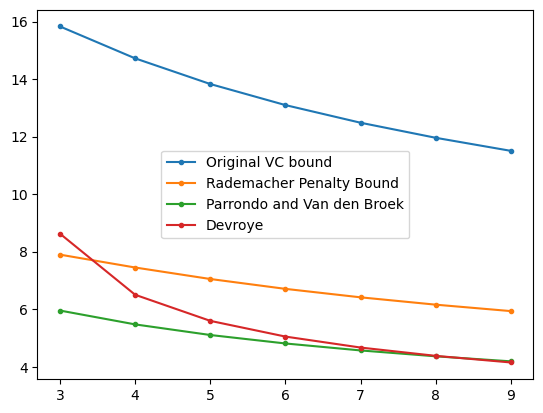

In [20]:
N = np.arange(3, 10, dtype=np.float64)
plt.plot(N, original(N), ".-")
plt.plot(N, Rademacher(N), ".-")
plt.plot(N, Parrondo(N), ".-")
plt.plot(N, Devroye(N), ".-")

plt.legend([
    "Original VC bound",
    "Rademacher Penalty Bound",
    "Parrondo and Van den Broek",
    "Devroye",
])
#plt.show()

Parrondo and Van den Broek Bound is smallest.

## 4 Bias and Variance

In [35]:
def f(x):
    return np.sin(np.pi*x)

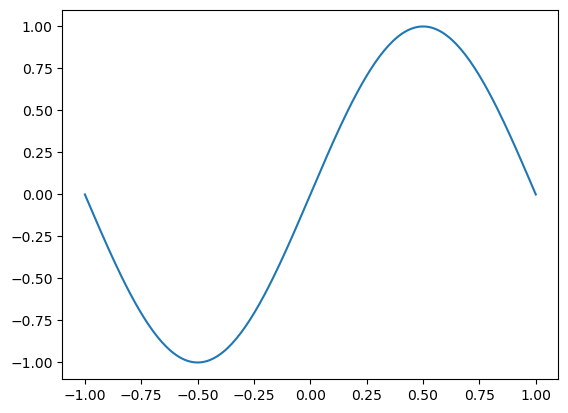

In [36]:
x = np.linspace(-1, 1, 200)
plt.plot(x, f(x))
plt.show()

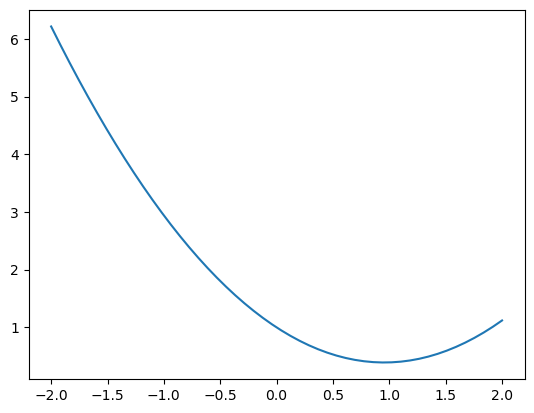

In [39]:
import scipy.integrate as integrate
import scipy

def error(b):
    return integrate.quad(lambda x: (f(x) - b*x)**2, -1, 1)[0]
    
errs = [error(b) for b in np.linspace(-2, 2)]

plt.plot(np.linspace(-2, 2), errs)
plt.show()

In [40]:
optim = scipy.optimize.minimize_scalar(error, bounds=(-2,2))
print(optim)

     fun: 0.39207289814597335
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 9
     nit: 5
 success: True
       x: 0.954929658551372


In [60]:
errors = []
aa = []
varss = []
for i in range(10000):
    x1 = np.random.rand()*2-1
    x2 = np.random.rand()*2-1
    X = np.array([[x1], [x2]])

    y1 = f(x1)
    y2 = f(x2)
    y = np.array([[y1], [y2]])

    a = np.linalg.solve(X.T @ X, X.T @ y)[0][0]
    
    aa.append(a)
mean = np.mean(aa)
mean

1.4304173712606363

So no answer is coreect, choose e.

variance 0.24138491741358467
error 0.5058367069404514
ahat 1.4234543148660903


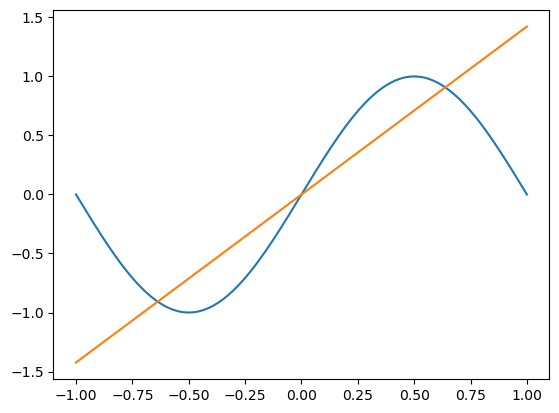

In [62]:
aa1 = []
for i in range(10000):
    x1 = np.random.rand()*2-1
    x2 = np.random.rand()*2-1
    X = np.array([[x1], [x2]])

    y1 = f(x1)
    y2 = f(x2)
    y = np.array([[y1], [y2]])

    a = np.linalg.solve(X.T @ X, X.T @ y)[0][0]
    var = scipy.integrate.quad(lambda x: (a*x-1.304*x)**2, -1, 1)
    error = scipy.integrate.quad(lambda x: (a*x - f(x))**2, -1, 1)


    aa1.append(a)
    varss.append(var)
    errors.append(error)
    
variance = np.mean(varss)
error = np.mean(errors)
print("variance", variance)
print("error", error)
    
ahat = np.mean(aa1)
print("ahat", ahat)

plt.plot(x, f(x))
plt.plot(x, ahat*x)
plt.show()

In [63]:
bias = scipy.integrate.quad(lambda x: (ahat*x - f(x))**2, -1, 1)[0]/2
bias

0.26920823359792834

So bias is 0.3, variance is 0.2.

In [75]:
def f(X):
    return np.column_stack([np.sin(np.pi*X[:, 1])])

In [65]:
class LinearModel:
    
    def transform(self, X):
        raise NotImplementedError
    
    def fit(self, X, y):
        Z = self.transform(X)
        self.w = np.linalg.solve(Z.T @ Z, Z.T @ y)
        
    def predict(self, X):
        Z = self.transform(X)
        return Z @ self.w

In [66]:
class H0(LinearModel):
    def description(self):
        return "H0: y = b"
    
    def transform(self, X):
        return X[:,0,np.newaxis]
    
    def __str__(self):
        return "y = {}".format(self.w[0,0])

In [67]:
class H1(LinearModel):
    def description(self):
        return "H1: y = ax"
    
    def transform(self, X):
        return X[:,1,np.newaxis]
    
    def __str__(self):
        return "y = {}x".format(self.w[0,0])

In [68]:
class H2(LinearModel):
    def description(self):
        return "H2: y = b + ax"
    
    def transform(self, X):
        return X
    
    def __str__(self):
        return "y = {} + {}x".format(self.w[0,0], self.w[1,0])

In [69]:
class H3(LinearModel):
    def description(self):
        return "H3: y = ax^2"
    
    def transform(self, X):
        return X[:,1,np.newaxis]**2
    
    def __str__(self):
        return "y = {}x^2".format(self.w[0,0])

In [70]:
class H4(LinearModel):
    def description(self):
        return "H4: y = b + ax^2"
    
    def transform(self, X):
        Z = np.zeros(X.shape)
        Z[:,0] = X[:,0]
        Z[:,1] = X[:,1]**2
        return Z
    
    def __str__(self):
        return "y = {} + {}x^2".format(self.w[0,0], self.w[1,0])

In [71]:
def sample():
    sample_X = np.array([
        [1, np.random.rand()*2 - 1],
        [1, np.random.rand()*2 - 1],
    ])
    sample_y = f(sample_X)
    return sample_X, sample_y

In [81]:
def mean_error(model, samples):
    ses = []
    for i in range(samples):
        # Fit model to a sample of two (x,y) points
        X, y = sample()
        model.fit(X, y)
        
        # Compute out-of-sample error by summing a large number of samples
        test_X = np.column_stack([np.ones(100), np.linspace(-1, 1, 100)])
        predicted_y = model.predict(test_X)
        actual_y = f(test_X)
        se = np.mean((actual_y - predicted_y)**2)
        
        ses.append(se)
    return np.mean(ses)

In [80]:
def expected_w(model, samples):
    ws = []
    for i in range(samples):
        X, y = sample()
        model.fit(X, y)
        ws.append(model.w.copy())
        
    return np.mean(ws, axis=0)

In [82]:
def bias(target_function, expected_model):
    # bias = Expected_X [ (gbar(x) - f(x))^2 ]
    test_X = np.column_stack([np.ones(100), np.linspace(-1, 1, 100)])
    predicted_y = expected_model.predict(test_X)
    actual_y = f(test_X)
    return np.mean((actual_y - predicted_y)**2)

def variance(model, expected_model, samples):
    # variance = Expected_X [ Expected_D [ (gD(x) - gha    t(x))^2 ] ]
    variances = []
    test_X = np.column_stack([np.ones(100), np.linspace(-1, 1, 100)])
    expected_model_predicted_y = expected_model.predict(test_X)
    for i in range(samples):
        X, y = sample()
        model.fit(X, y)
        
        # Compute distance to expected model (squared)
        this_model_predicted_y = model.predict(test_X)
        this_variance = np.mean((this_model_predicted_y - expected_model_predicted_y)**2)
        
        variances.append(this_variance)
    return np.mean(variances)


In [83]:
num_samples = 10000

for model_class in [H0, H1, H2, H3, H4]:
    model = model_class()
    print()
    print(model.description())
    print("Mean out-of-sample error: ", mean_error(model, num_samples))
    Ew = expected_w(model, num_samples)
    expected_model = model_class()
    expected_model.w = Ew
    print("Bias: ", bias(f, expected_model))
    print("Variance: ", variance(model, expected_model, num_samples))
    print("Expected model: ", expected_model)


H0: y = b
Mean out-of-sample error:  0.7487974642321141
Bias:  0.4950090901012619
Variance:  0.2508503106662746
Expected model:  y = -0.0030149794795059086

H1: y = ax
Mean out-of-sample error:  0.5269373125604621
Bias:  0.2816893000290471
Variance:  0.24418799935148364
Expected model:  y = 1.4068299888186848x

H2: y = b + ax
Mean out-of-sample error:  1.875747629783829
Bias:  0.2116976108420808
Variance:  1.6520008959515948
Expected model:  y = 0.014060356064221248 + 0.7699404331380617x

H3: y = ax^2
Mean out-of-sample error:  14.219765146382231
Bias:  0.4965474787040616
Variance:  13.268835020014073
Expected model:  y = 0.0862263735703326x^2

H4: y = b + ax^2
Mean out-of-sample error:  7436.989723807457
Bias:  0.5380742238193589
Variance:  35325.95773870807
Expected model:  y = 0.311033682129563 + -0.4879871706389063x^2


So y=ax has least squared error, but y=b has least variance.

## 8 VC Dimension

$$ m_(N) = 2^N - \sum_{i = 0}^{N - q - 1} 2^i {N - i - 1 \choose q}$$

When N-1 <= q, it is a break point, so the VC dimension is q.

**Min bound:** The sets might not intersect, producing an empty hypothesis set, which has a zero VC dimension.

**Max bound:** Imagine that the intersection of the sets is equal to one of the sets. 

So the answer is b

10 is e, it is a bit difficult.